<a href="https://colab.research.google.com/github/basimeot/Project/blob/main/Official_Astronomy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

url = "https://raw.githubusercontent.com/basimeot/Project/refs/heads/main/Meteorite_Landings.csv"
df = pd.read_csv(url)
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


,0
name,0
id,0
nametype,0
recclass,0
mass (g),131
fall,0
year,291
reclat,7315
reclong,7315
GeoLocation,7315


In [ ]:
# Drop rows where year or mass is missing
df = df.dropna(subset=['year', 'mass (g)'])

# Convert year column to integer
df['year'] = df['year'].astype(int)


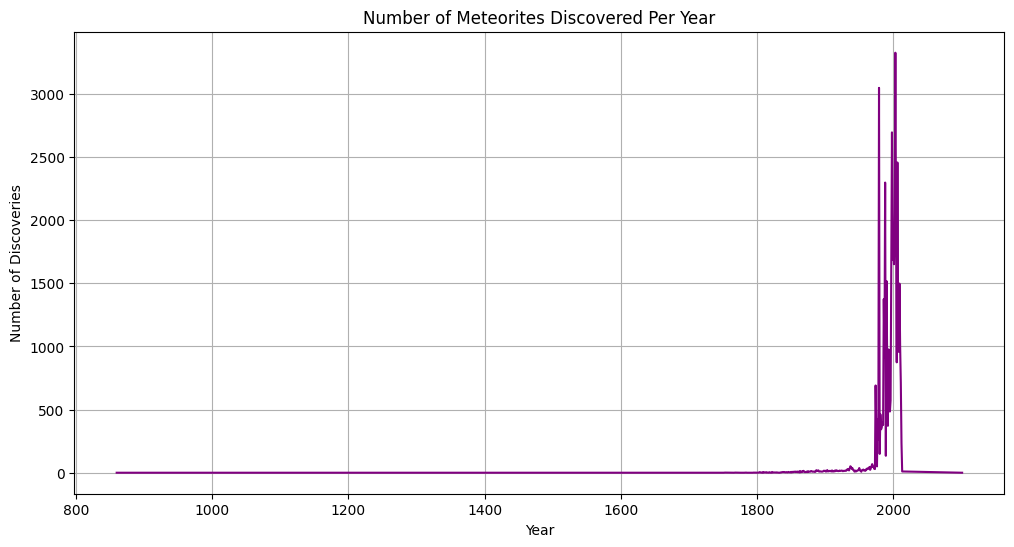

In [ ]:
import matplotlib.pyplot as plt

# Count meteorite discoveries per year
year_counts = df['year'].value_counts().sort_index()

# Plot it
plt.figure(figsize=(12,6))
plt.plot(year_counts.index, year_counts.values, color='purple')
plt.title('Number of Meteorites Discovered Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Discoveries')
plt.grid(True)
plt.show()


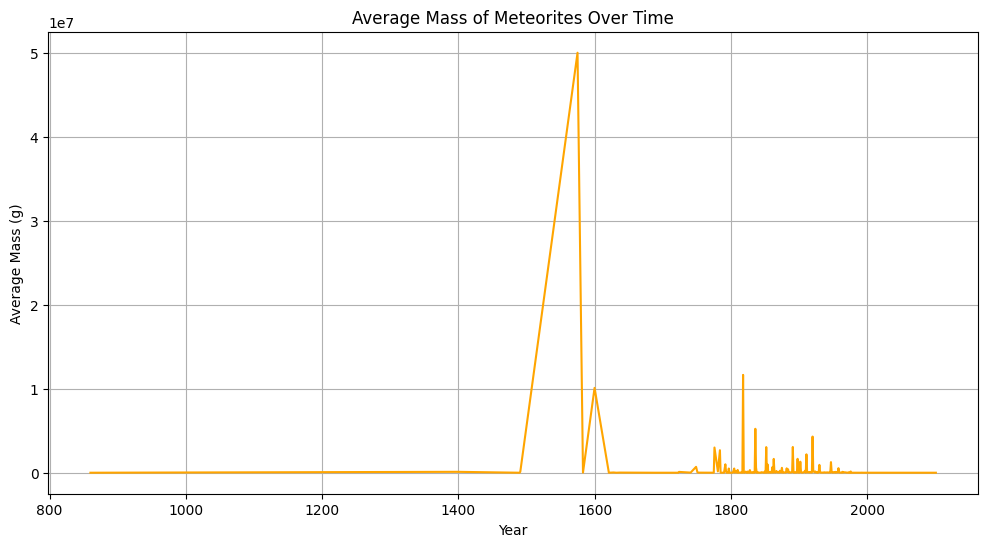

In [ ]:
# Plot average meteorite mass per year
avg_mass_per_year = df.group is by('year')['mass (g)'].mean()

plt.figure(figsize=(12,6))
plt.plot(avg_mass_per_year.index, avg_mass_per_year.values, color='orange')
plt.title('Average Mass of Meteorites Over Time')
plt.xlabel('Year')
plt.ylabel('Average Mass (g)')
plt.grid(True)
plt.show()


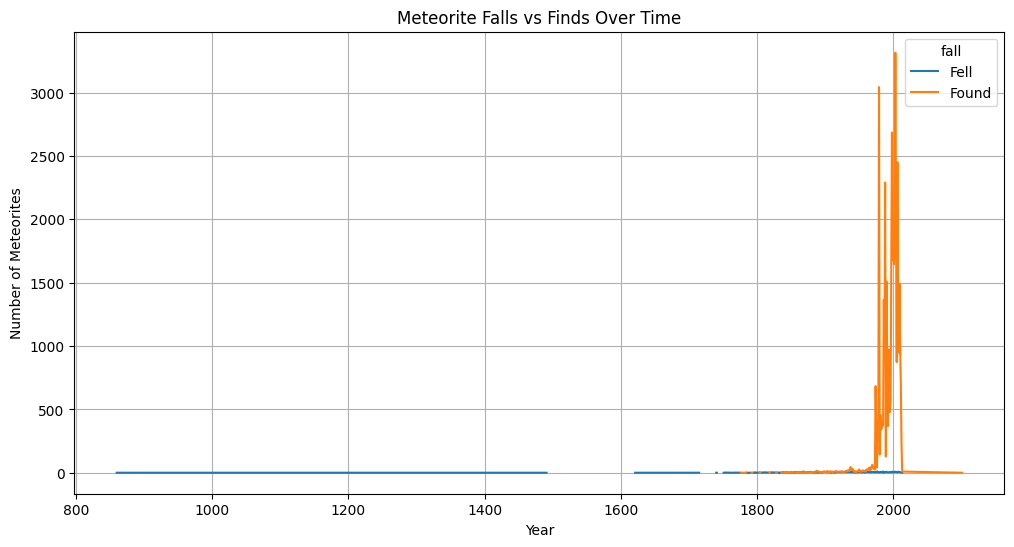

In [ ]:
# Count 'Fell' vs 'Found' by year
fall_trends = df.groupby(['year', 'fall']).size().unstack()

# Plot it
fall_trends.plot(kind='line', figsize=(12,6))
plt.title('Meteorite Falls vs Finds Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Meteorites')
plt.grid(True)
plt.show()


In [ ]:
print("Earliest year recorded:", df['year'].min())
print("Most meteorites found in one year:", year_counts.max())
print("Year with most discoveries:", year_counts.idxmax())


Earliest year recorded: 860
Most meteorites found in one year: 3323
Year with most discoveries: 2003


In [ ]:
print(df.columns)

Index(['year', 'mass (g)', 'year_only'], dtype='object')


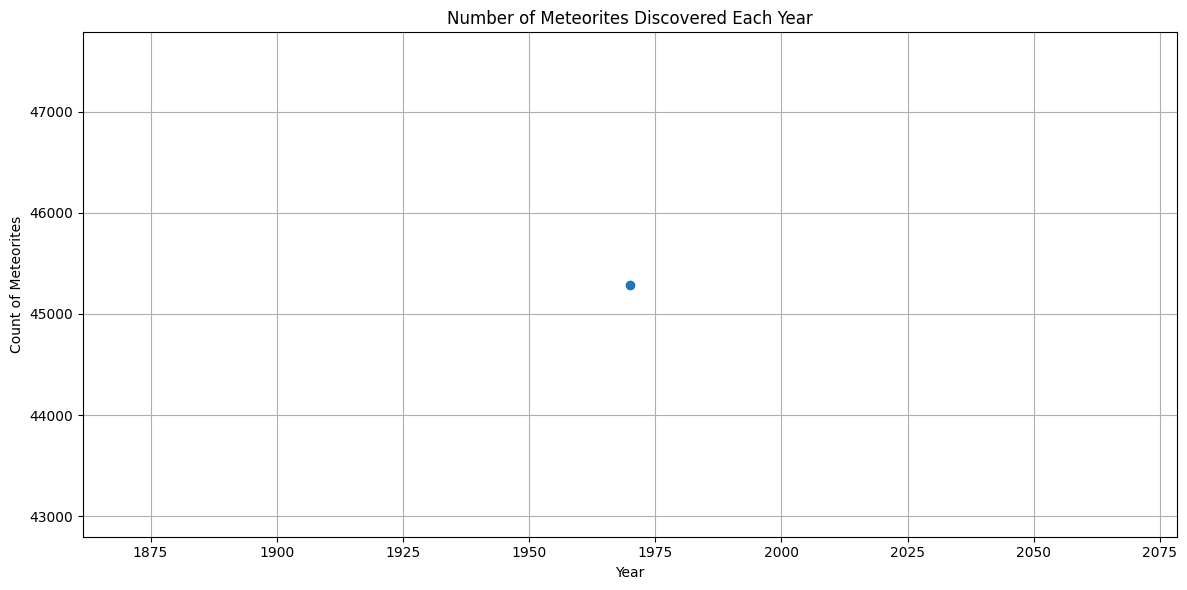

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure 'year_only' is numeric
df['year_only'] = pd.to_numeric(df['year_only'], errors='coerce')

# Drop any rows with missing or invalid years
df_clean = df.dropna(subset=['year_only'])

# Count number of meteorites per year
yearly_counts = df_clean['year_only'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Number of Meteorites Discovered Each Year')
plt.xlabel('Year')
plt.ylabel('Count of Meteorites')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Unique years in dataset:", df['year_only'].nunique())
print("Years present:", df['year_only'].unique())

Unique years in dataset: 1
Years present: [1970]


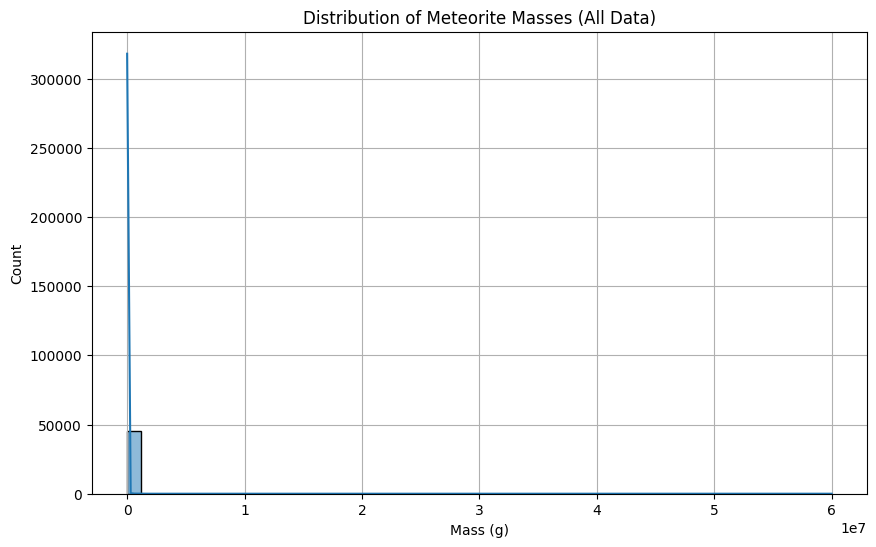

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['mass (g)'], bins=50, kde=True)
plt.title('Distribution of Meteorite Masses (All Data)')
plt.xlabel('Mass (g)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
yearly_counts

,count
year_only,
1970,45291


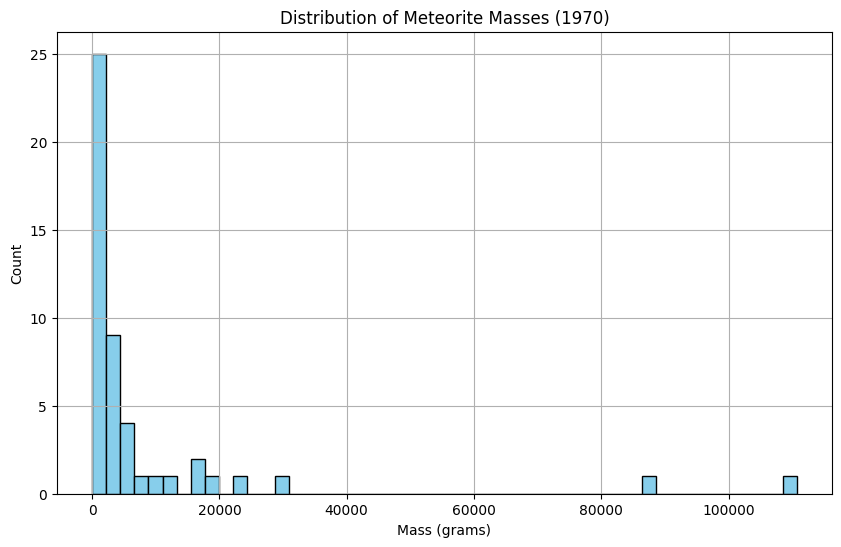

In [ ]:
import matplotlib.pyplot as plt

# Filter for 1970
df_1970 = df[df['year'] == 1970]

# Drop missing or zero values
mass_values = df_1970['mass (g)'].dropna()
mass_values = mass_values[mass_values > 0]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(mass_values, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Meteorite Masses (1970)')
plt.xlabel('Mass (grams)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Step 1: Clean the data
df_clean = df[['mass (g)', 'fall']].dropna()

# Step 2: Encode 'fall' column
df_clean = df_clean[df_clean['fall'].isin(['Fell', 'Found'])]
df_clean['fall_encoded'] = df_clean['fall'].map({'Fell': 1, 'Found': 0})

# Step 3: Features (X) and labels (y)
X = df_clean[['mass (g)']]
y = df_clean['fall_encoded']

# Step 4: Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9756124475833149

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8841
           1       0.00      0.00      0.00       221

    accuracy                           0.98      9062
   macro avg       0.49      0.50      0.49      9062
weighted avg       0.95      0.98      0.96      9062

